In [1]:
import pickle
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt  
import numpy as np 
import cartopy 
import cartopy.crs as ccrs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from eod import trmm

In [2]:
test_dir = '/users/global/cornkle/data/pythonWorkspace/proj_CEH/eod/tests/test_files/trmm'
#test_dir = '/users/global/cornkle/data/OBS/TRMM/trmm_swaths_WA'
#obj.fpaths[1001] #[-10,10,7,14]

In [3]:
area=[-15, 10, 15, 20]
obj=trmm.ReadWA(test_dir, area=area)#, area=area)
obj.fpaths


2785
897
3515
803


['/users/global/cornkle/data/pythonWorkspace/proj_CEH/eod/tests/test_files/trmm/2007/08/2A25.20070816.55562.7.gra',
 '/users/global/cornkle/data/pythonWorkspace/proj_CEH/eod/tests/test_files/trmm/2007/08/2A25.20070817.55577.7.gra']

In [4]:
td = obj.get_data(obj.fpaths[0])
box = np.where((td['lon'].values > area[0]) & (td['lon'].values < area[2]) & (td['lat'].values > area[1]) & (
td['lat'].values < area[3]))

np.sum(td.values[box]>0.5)

897

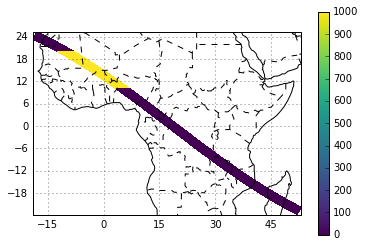

In [5]:
td.values[box]=1000
ax = plt.axes(projection=ccrs.PlateCarree())
td.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat')
ax.coastlines(); 
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

In [6]:
da = xr.DataArray(d['p'], coords={'lat':(('y', 'x'), d['lat']), 'lon':(('y', 'x'), d['lon'])}, dims=['y', 'x'])

NameError: name 'd' is not defined

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
da.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat')
ax.coastlines(); 
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');